## Ildebrando Magnani

im975

Homework #5

This program shows the downward bias in the OLS estimate of α in the AR(1) process. 

The estimation is performed for different pairs of "true" alphas and sample sizes.

I tried to emphasize readability and time efficiency. 

I'm submitting late, I apologize for it. I had problems with Julia the whole past week.

To start, we generate a function that runs AR(1) simulation. It returns an array of observations.

In [1]:
using Distributions
srand(15) #seed selection


function ar1_gen(number_of_obs::Int64, alpha::Float64, beta::Float64, s::Float64)
    
    x_data = Array(Float64, number_of_obs + 1)
    x_data[1] = beta / (1.0 - alpha)
    w = rand(Normal(0.0, 1.0), number_of_obs + 1)
    for t in 1:number_of_obs
        x_data[t+1] = beta + alpha * x_data[t] + s * w[t+1]
    end 
    return x_data

end

ar1_gen (generic function with 1 method)

To make a cleaner code, I try to create 2 more "specialized" functions:

1- one that does the estimation for alpha, given the AR1 observations

2- one that computes the bias, given AR1 sample sizes and number of alpha-estimation repetitions.

Here I define function that estimates alpha:

In [2]:
function alpha_estimation(x_data::Array{Float64})

    xlag = x_data[1:end-1]
    x = x_data[2:end]
    number_of_obs = length(x_data) - 1
    sum_x_times_xlag = dot(xlag,x)
    sum_xlag_times_xlag = dot(xlag,xlag)
    xlag_bar = mean(xlag)
    x_bar = mean(x)
    cov = sum_x_times_xlag - (number_of_obs * xlag_bar * x_bar)
    var = sum_xlag_times_xlag - (number_of_obs * xlag_bar *xlag_bar)
    alpha_est = cov / var
    return alpha_est

end
    

alpha_estimation (generic function with 1 method)

Here I define function that compute bias:

In [3]:
function bias_computation(repetitions::Int64, number_of_obs::Int64, alpha::Float64, beta::Float64, s::Float64)
    
    alpha_estimates = Array(Float64, repetitions)
    for i in 1:repetitions
        alpha_estimates[i] = alpha_estimation(ar1_gen(number_of_obs, alpha, beta, s))
    end
    bias = mean(alpha_estimates) - alpha
    return bias

end

bias_computation (generic function with 1 method)

Below, I loop over different true alpha values and AR(1) sample sizes to obtain the final data about the bias of OLS estimator.

I also reproduce the same code from the last homework (with minor modifications) to plot results.

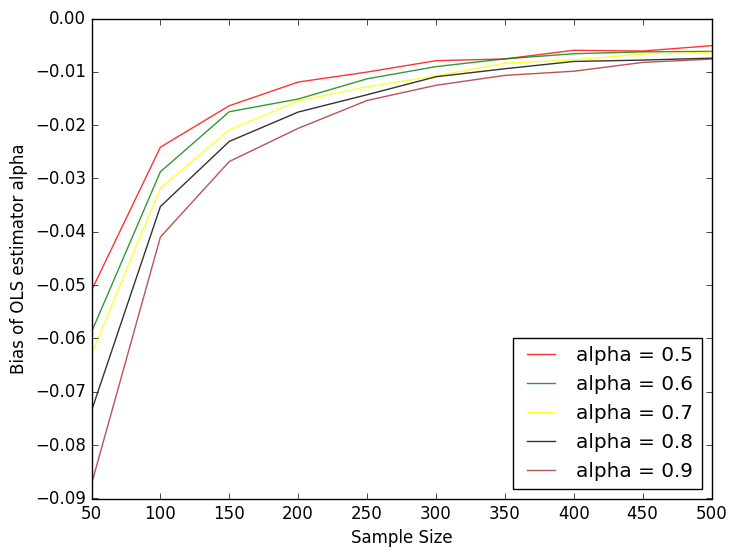

3.936577 seconds (2.01 M allocations: 4.314 GB, 7.27% gc time)


In [4]:
using PyPlot

alpha_vals = collect(Float64, linspace(0.5, 0.9, 5))
sample_sizes = collect(Int64, linspace(50, 500, 10))
biases = Array(Float64, 1)
repetitions = 10000

@time for alphatrue in 1:length(alpha_vals)
    
    for samplesize in 1:length(sample_sizes)
        
        bias = bias_computation(repetitions, sample_sizes[samplesize], alpha_vals[alphatrue], 1.0, 1.0)
        push!(biases, bias)
    end
end

bias_data = biases[2:51]

# "Unpack" the values of the biases for different values of true alpha
a5 = bias_data[1:10]
a6 = bias_data[11:20]
a7 = bias_data[21:30]
a8 = bias_data[31:40]
a9 = bias_data[41:50]

# Plot the results
fig, ax = subplots(figsize=(8, 6))
x = collect(linspace(50, 500, 10))


plot(x, a5, color = "red", linewidth=1, label = "alpha = 0.5", alpha=0.8)
plot(x, a6, color = "green", linewidth=1, label = "alpha = 0.6", alpha=0.8)
plot(x, a7, color = "yellow", linewidth=1, label = "alpha = 0.7", alpha=0.8)
plot(x, a8, color = "black", linewidth=1, label = "alpha = 0.8", alpha=0.8)
plot(x, a9, color = "brown", linewidth=1, label = "alpha = 0.9", alpha=0.8)
xlabel("Sample Size")
ylabel("Bias of OLS estimator alpha")
legend(loc="lower right")
show()



The bias is downward and it converges asymptotically towards zero. The estimator for alpha clearly displays a greater (downward) bias as the true alpha value gets closer to 1.